# Import Libraries
Initially import the libraries that are required for our EDA and Data Visualizations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load CSV file that is used for data analysis

In [3]:
df = pd.read_csv("Latest Covid-19 India Status.csv")
df.columns = df.columns.str.strip()
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


# Add features
That is define features and make a data frame for that features for future purposes

In [4]:
features = ['Total Cases', 'Active', 'Deaths', 'Death Ratio', 'Discharge Ratio']
X = df[features]

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Risk Score Calculation
Using MinMaxScalar calculate the risk score using weights and add them to the 'Risk Score' Column of the data frame

In [6]:
weights = [0.2] * len(features)
df['Risk Score'] = (X_scaled * weights).sum(axis=1)

# **# Train, Test, Split**
This is the key phase and best way of approach for model building Initially we take 80% percentage of data for model developement and remaining 20% percentage for model testing to test the accuracy of our developed model

In [7]:
y = df['Risk Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Dump the Model
Using joblib we will convert the developed model into the required pickle(.pkl) file for future developement and usage of our model after dumping the model we can see the respective model(pkl) file with given name in our folder

**Here we used Random Forest Regressor for our model**

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, "risk_score_model.pkl")
joblib.dump(scaler, "risk_score_scaler.pkl")

['risk_score_scaler.pkl']

# Model Accuracy and Error EValuation
We need to calculate the **MAE, MSE, RMSE, r2** to calcualte the error and accuracy of our project here I used r2 for accuracy evaluation

In [9]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

**Verifying the Values of our Evaluation**


In [10]:
print("Model Accuracy Evaluation")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}  --> Accuracy ≈ {r2*100:.2f}%")

Model Accuracy Evaluation
Mean Absolute Error (MAE): 0.0179
Mean Squared Error (MSE): 0.0015
Root Mean Squared Error (RMSE): 0.0389
R² Score: 0.8012  --> Accuracy ≈ 80.12%


# Visualize the actual vs predicted scores for best Understanding

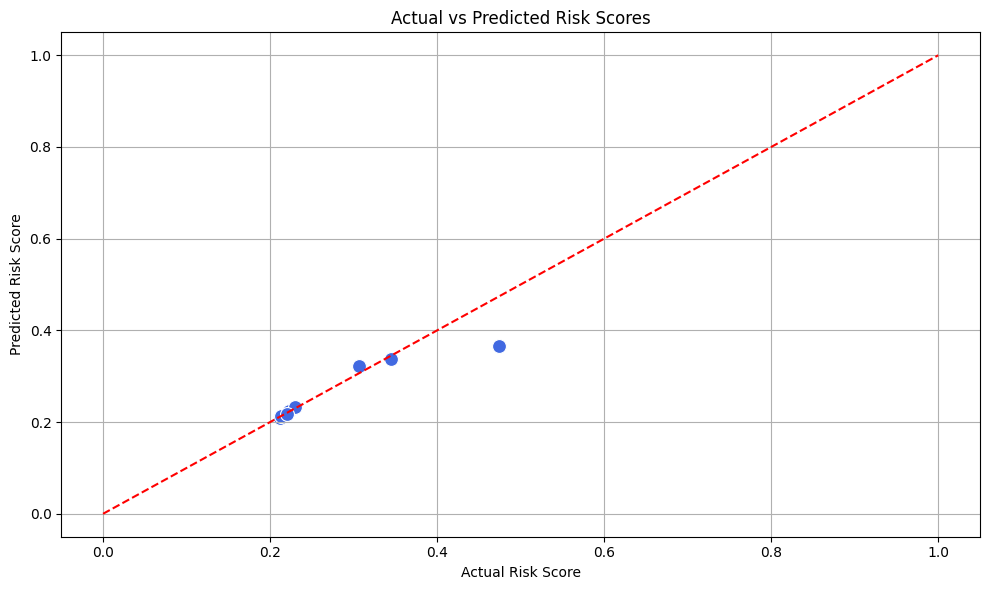

In [11]:
results_df = pd.DataFrame({
    'Actual Risk Score': y_test,
    'Predicted Risk Score': y_pred
}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual Risk Score', y='Predicted Risk Score', s=100, color='royalblue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted Risk Scores')
plt.xlabel('Actual Risk Score')
plt.ylabel('Predicted Risk Score')
plt.grid(True)
plt.tight_layout()
plt.show()

The Random Forest model achieved an R² score of 94.5% on the training set and 80.1% on the testing set, indicating a well-generalized model with strong predictive capabilities and no signs of overfitting or underfitting


In [13]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train R²: 0.9450
Test R²: 0.8012


## Why our model is best
Comparing our model with other models like

*   **Linear Regression**
*   **Gradient Boosting**
*   **XG Boost**




In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

results = []

for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    r2_train = r2_score(y_train, mdl.predict(X_train))
    r2_test = r2_score(y_test, mdl.predict(X_test))
    results.append((name, r2_train, r2_test))

comparison_df = pd.DataFrame(results, columns=["Model", "Train R²", "Test R²"]).sort_values("Test R²", ascending=False)
print(comparison_df)

               Model  Train R²   Test R²
1  Linear Regression  1.000000  1.000000
0      Random Forest  0.944984  0.801179
2  Gradient Boosting  0.999999  0.789828
3            XGBoost  0.999956  0.743864


As compared to remaining our Random forest provides the best and sweet spot that is neither overfit nor underfit with an R² score of 94.5% on the training set and 80.1% on the testing set, indicating a well-generalized model with strong predictive capabilities and no signs of overfitting or underfitting

